<a href="https://colab.research.google.com/github/Erwdev/DigitalImageProcessing/blob/main/PCD_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Benedictus Erwin Widianto
NIM: 23/520176/PA/22350

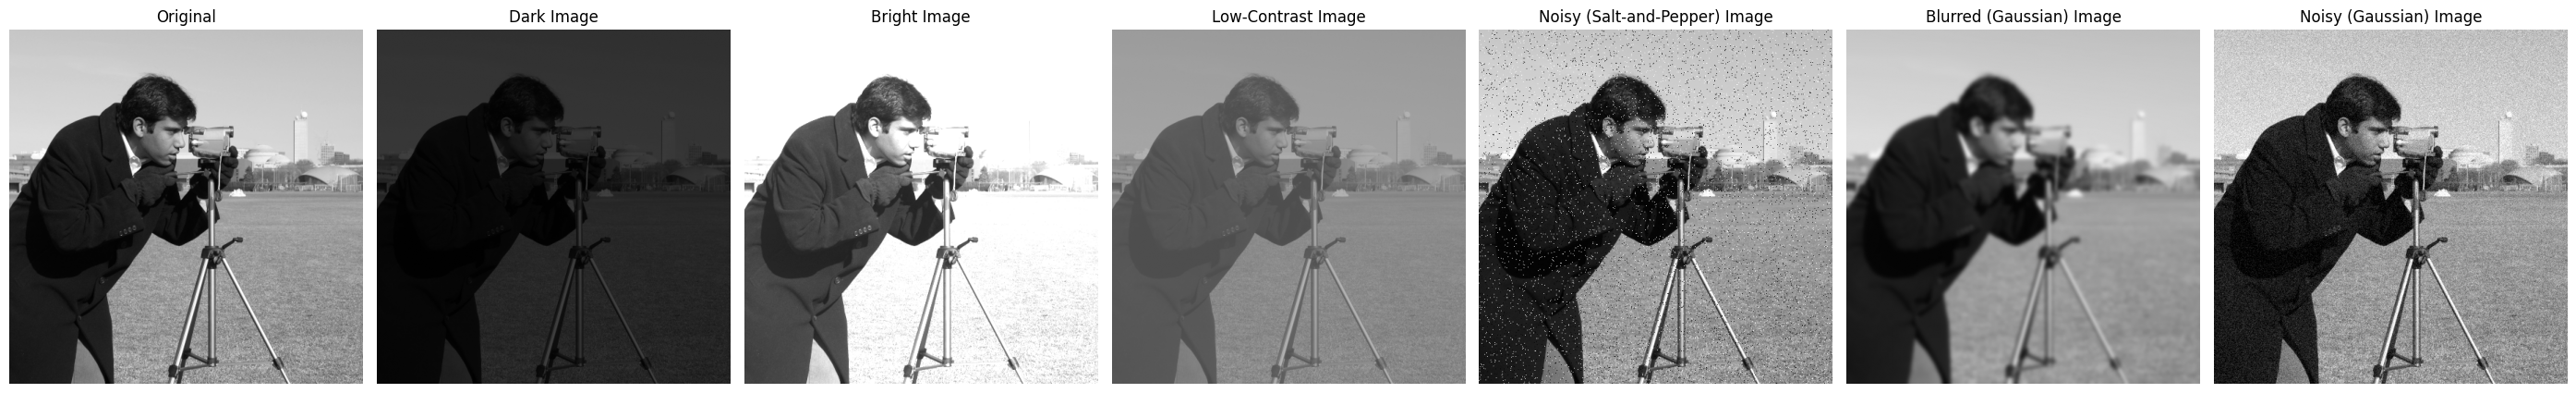

In [ ]:
#Generate augmented image for enhancement

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

def generate_sample_images(image_path=None):
    original_image = data.camera()
    original_image = cv2.normalize(original_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    dark_image = cv2.convertScaleAbs(original_image, alpha=0.25, beta=0)

    bright_image = cv2.convertScaleAbs(original_image, alpha=1.5, beta=30)

    low_contrast_image = np.clip((original_image.astype(np.float32) - 128) * 0.4 + 128, 0, 255).astype(np.uint8)

    s_vs_p = 0.5
    amount = 0.04
    noisy_image_sp = original_image.copy()
    num_salt = int(np.ceil(amount * original_image.size * s_vs_p))
    coords = (np.random.randint(0, original_image.shape[0], num_salt),
              np.random.randint(0, original_image.shape[1], num_salt))
    noisy_image_sp[coords] = 255
    num_pepper = int(np.ceil(amount * original_image.size * (1. - s_vs_p)))
    coords = (np.random.randint(0, original_image.shape[0], num_pepper),
              np.random.randint(0, original_image.shape[1], num_pepper))
    noisy_image_sp[coords] = 0

    blurred_image = cv2.GaussianBlur(original_image, (15, 15), 0)

    mean = 0
    var = 200
    sigma = var**0.5
    gaussian_noise = np.random.normal(mean, sigma, original_image.shape)
    noisy_image_gaussian = np.clip(original_image.astype(np.float32) + gaussian_noise, 0, 255).astype(np.uint8)

    return {
        "Original": original_image,
        "Dark Image": dark_image,
        "Bright Image": bright_image,
        "Low-Contrast Image": low_contrast_image,
        "Noisy (Salt-and-Pepper) Image": noisy_image_sp,
        "Blurred (Gaussian) Image": blurred_image,
        "Noisy (Gaussian) Image": noisy_image_gaussian,
    }

def display_images(images_dict):
    num_images = len(images_dict)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 4, 5))
    if num_images == 1:
        axes = [axes]
    for ax, (title, img) in zip(axes, images_dict.items()):
        ax.imshow(img, cmap='gray', vmin=0, vmax=255)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_images = generate_sample_images()
display_images(sample_images)




1.   DARK IMAGE ENHANCEMENT




In [ ]:
def log_transform(image):
  image_float = image.astype(np.float32)

  normalized_image = cv2.normalize(image_float, None, 0, 1, cv2.NORM_MINMAX)

  log_transformed = np.log1p(normalized_image)

  C = 255 / np.log(1 + np.max(image))
  log_transformed = C * log_transformed

  log_transformed = np.clip(log_transformed, 0, 255).astype(np.uint8)

  return log_transformed

def hist_equalization(image):
  hist = np.zeros(256, dtype=int)
  flat_img = image.flatten()
  hist = np.bincount(flat_img, minlength=256)

  total_pixels = image.size
  pdf = hist / total_pixels

  cdf = np.cumsum(pdf)

  cdf_min = cdf[cdf>0].min()

  lookup_table = np.round((cdf - cdf_min) / (1- cdf_min) * 255).astype(np.uint8)

  equalized_image = np.zeros_like(image, dtype=np.uint8)

  equalized_image = lookup_table[image]

  return equalized_image

def constrast_stretch(image, output_min=0, output_max = 255):
  image_float = image.astype(np.float32)

  r_min = np.min(image_float)
  r_max = np.max(image_float)

  if r_max == r_min:
        return np.full_like(image, output_min, dtype=np.uint8)

  scale_factor = (output_max - output_min) / (r_max - r_min)
  stretch_image = (image_float - r_min) *scale_factor + output_min

  return np.clip(stretch_image, output_min, output_max).astype(np.uint8)

  #secara default karena range 0-255 maka output min=0 dan max=255





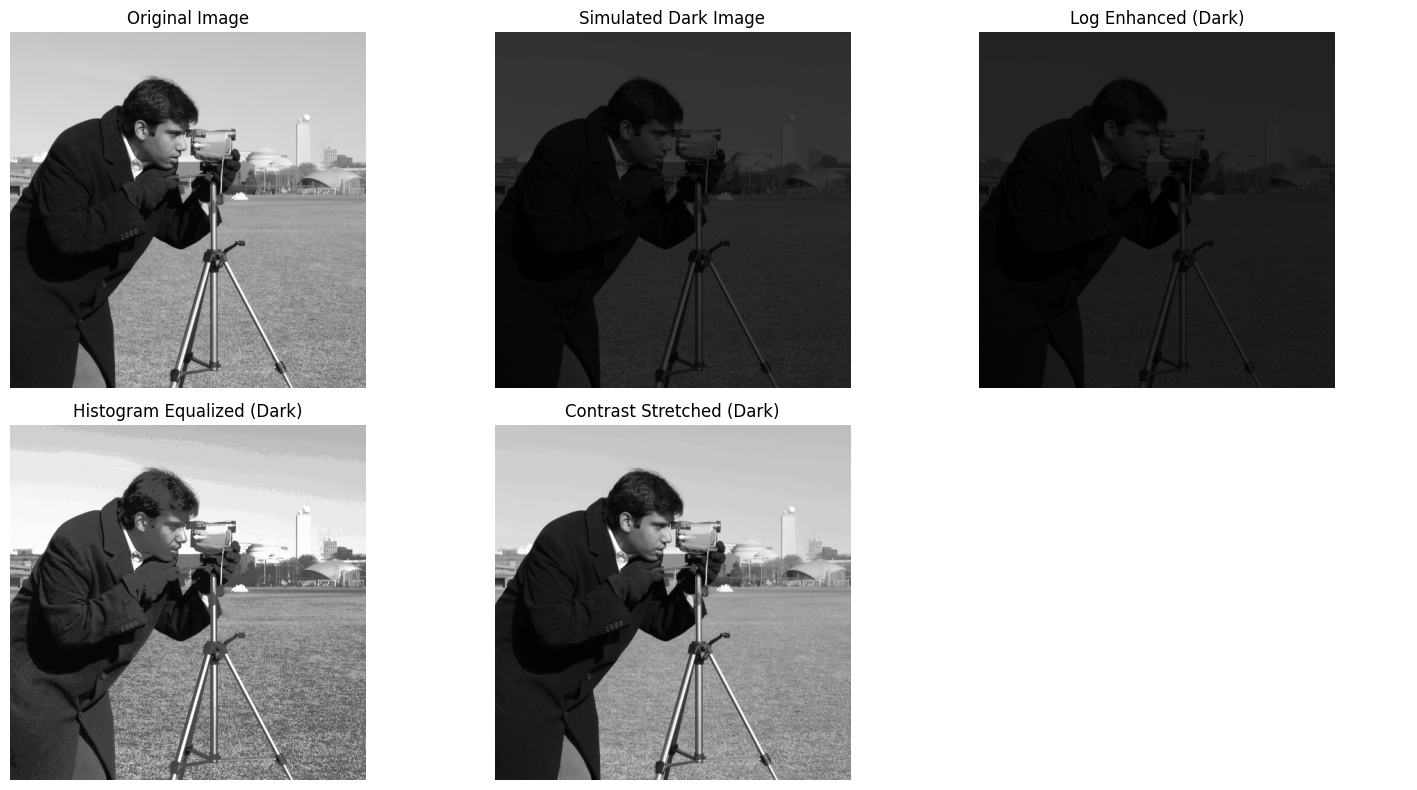

In [ ]:
dark_image = sample_images['Dark Image']

log_enhanced_image = log_transform(dark_image)
hist_eq_dark_image = hist_equalization(dark_image)
stretched_dark_image = constrast_stretch(dark_image)

images = [
    (sample_images['Original'], "Original Image"),
    (sample_images['Dark Image'], "Simulated Dark Image"),
    (log_enhanced_image, "Log Enhanced (Dark)"),
    (hist_eq_dark_image, "Histogram Equalized (Dark)"),
    (stretched_dark_image, "Contrast Stretched (Dark)")
]

visualize_images(images)

- Histogram equalization merupakan yang terbaik untuk memulihkan gambar yang terlalu gelap

Low constrast Enhancement

In [ ]:
def gamma_correct(image, gamma_value= 1.0):
  image_float = image.astype(np.float32)

  normalized_image = image_float / 255.0

  gamma_corrected_image_float = normalized_image ** gamma_value

  gamma_corrected_image = np.clip(gamma_corrected_image_float * 255.0, 0, 255).astype(np.uint8)

  return gamma_corrected_image



In [ ]:
def visualize_images(images_dict):
  # --- Dynamically compute subplot grid ---
  n_images = len(images)
  n_cols = 3
  n_rows = (n_images + n_cols - 1) // n_cols

  plt.figure(figsize=(15, 4 * n_rows))

# --- Plot each image using plt.subplot() ---
  for i, (img, title) in enumerate(images, start=1):
    plt.subplot(n_rows, n_cols, i)
    plt.imshow(img, cmap='gray',vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')

# --- Hide remaining subplot slots if any ---
  for j in range(len(images) + 1, n_rows * n_cols + 1):
    plt.subplot(n_rows, n_cols, j)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

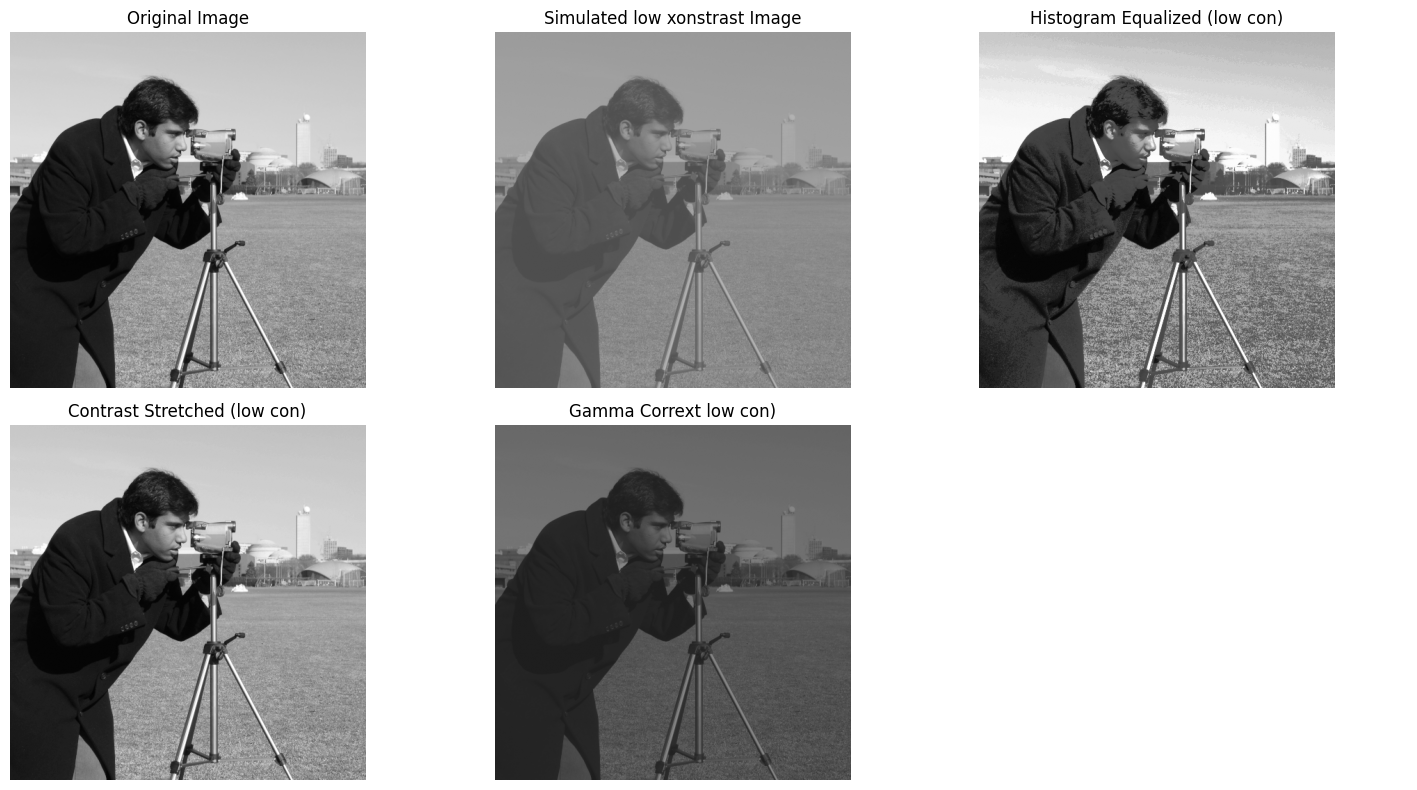

In [ ]:
low_con_image = sample_images['Low-Contrast Image']


hist_eq_low_con_image = hist_equalization(low_con_image)
stretched_low_con_image = constrast_stretch(low_con_image)
gamma_low_con_image = gamma_correct(low_con_image, gamma_value = 1.8)

images = [
    (sample_images['Original'], "Original Image"),
    (low_con_image, "Simulated low xonstrast Image"),

    (hist_eq_low_con_image, "Histogram Equalized (low con)"),
    (stretched_low_con_image, "Contrast Stretched (low con)"),
    (gamma_low_con_image, "Gamma Corrext low con)")

]
visualize_images(images)


Histogram equalization mengembalikan gambar hampir mirip dengan gambar original

Enhancement gambar terlalu terang


/tmp/ipython-input-22475247.py:8: RuntimeWarning: overflow encountered in scalar add
  C = 255 / np.log(1 + np.max(image))
/tmp/ipython-input-22475247.py:8: RuntimeWarning: divide by zero encountered in log
  C = 255 / np.log(1 + np.max(image))


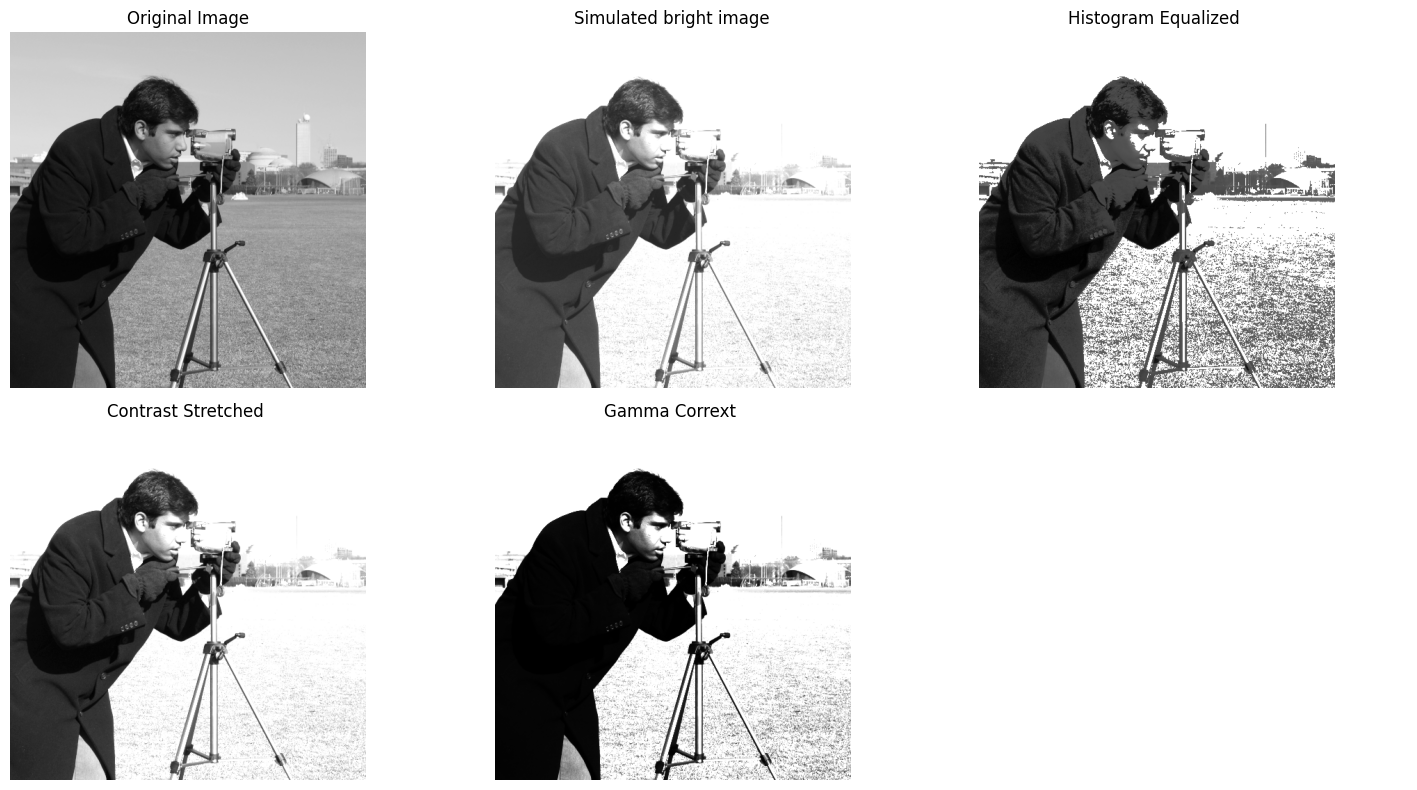

In [ ]:
bright_image = sample_images['Bright Image']

log_enhanced_image = log_transform(bright_image)
hist_eq_low_con_image = hist_equalization(bright_image)
stretched_low_con_image = constrast_stretch(bright_image)
gamma_low_con_image = gamma_correct(bright_image, gamma_value = 3)

images = [
    (sample_images['Original'], "Original Image"),
    (bright_image, "Simulated bright image"),
    (hist_eq_low_con_image, "Histogram Equalized "),
    (stretched_low_con_image, "Contrast Stretched "),
    (gamma_low_con_image, "Gamma Corrext ")

]

visualize_images(images)


gamma correct memerlukan nilai yang tepat untuk bisa memulihkan gambar ke semula

NOISY IMAGE ENHANCEMENT

In [ ]:
def median_filter(image, kernel_size = 3):
  #kernel size is a box

  if kernel_size % 2 == 0:
    raise ValueError('Kernel size must be odd number')

  height, width = image.shape

  output_image = np.zeros_like(image, dtype=np.uint8)

  pad_width = kernel_size // 2

  padded_image = np.pad(image, pad_width, mode='edge')
  #looping for kernel for each pixel in the image with kernel size 3 obtaining median value
  for r in range(height):
    for c in range(width):

      neighboorhood = padded_image[r : r + kernel_size, c : c + kernel_size]

      median_value = np.median(neighboorhood)

      output_image[r,c] = int(median_value)

  return output_image

def Average_filter(image, kernel_size = 3):
  #kernel size is a box

  if kernel_size % 2 == 0:
    raise ValueError('Kernel size must be odd number')

  height, width = image.shape

  output_image = np.zeros_like(image, dtype=np.uint8)

  pad_width = kernel_size // 2

  padded_image = np.pad(image, pad_width, mode='edge')
  #looping for kernel for each pixel in the image with kernel size 3 obtaining median value
  for r in range(height):
    for c in range(width):

      neighboorhood = padded_image[r : r + kernel_size, c : c + kernel_size]

      avg_value = np.mean(neighboorhood)

      output_image[r,c] = int(avg_value)

  return output_image

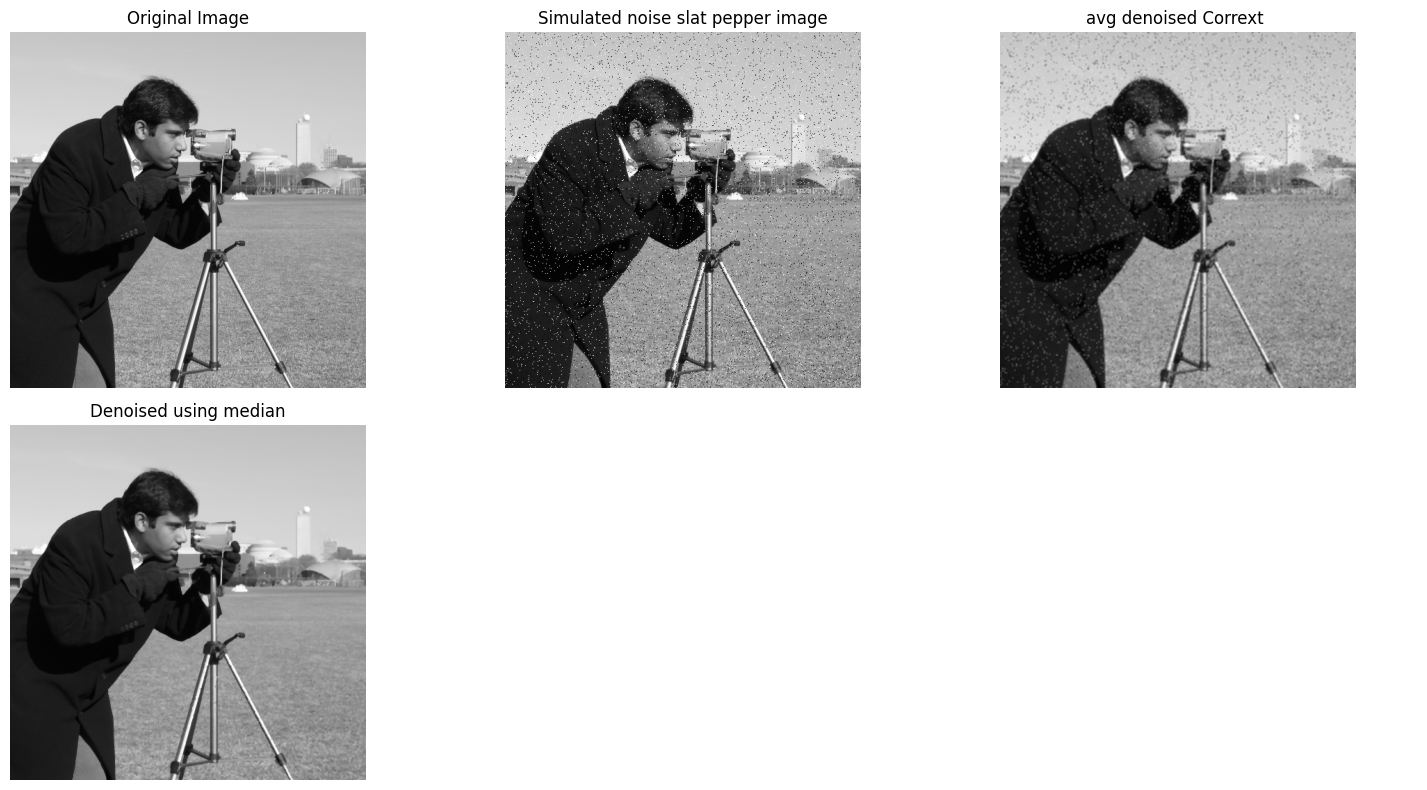

In [ ]:
noise_image = sample_images['Noisy (Salt-and-Pepper) Image']

median_denoise_image = median_filter(noise_image)
avg_denoise_image = Average_filter(noise_image)

images = [
    (sample_images['Original'], "Original Image"),
    (noise_image, "Simulated noise slat pepper image"),
    (avg_denoise_image, "avg denoised Corrext "),
    (median_denoise_image, "Denoised using median")

]

visualize_images(images)


median filtering berhasil memulihkan gambar dan mempertahankan detail asli dari gambar

Enhance blurred image

In [ ]:
def gaussian_filter(image, kernel_size = 3, sigma = 1.0):
  if kernel_size %2 == 0:
    raise ValueError('Kernel size must be odd')

  kernel = np.zeros((kernel_size, kernel_size))
  height, width = image.shape
  output_image = np.zeros_like(image, dtype=np.uint8)

  pad_width = kernel_size // 2

  padded_image = np.pad(image, pad_width, mode='edge')

  for i in range(kernel_size):
    for j in range(kernel_size):
      x = i - pad_width
      y = j - pad_width
      kernel[i, j] = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

  kernel = kernel / np.sum(kernel)

  for r in range(height):
    for c in range(width):
      neighborhood = padded_image[r:r + kernel_size, c: c+kernel_size]
      value = np.sum(neighborhood * kernel)

      output_image[r, c] = np.clip(value, 0, 255).astype(np.uint8)

  return output_image


def simple_sharpen_filter(image, sigma=1.0, kernel_size = 3, alpha = 1.0):
  gaussian_image = gaussian_filter(image, kernel_size, sigma)

  sharpened_image = image + alpha * (image - gaussian_image)

  sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

  return sharpened_image



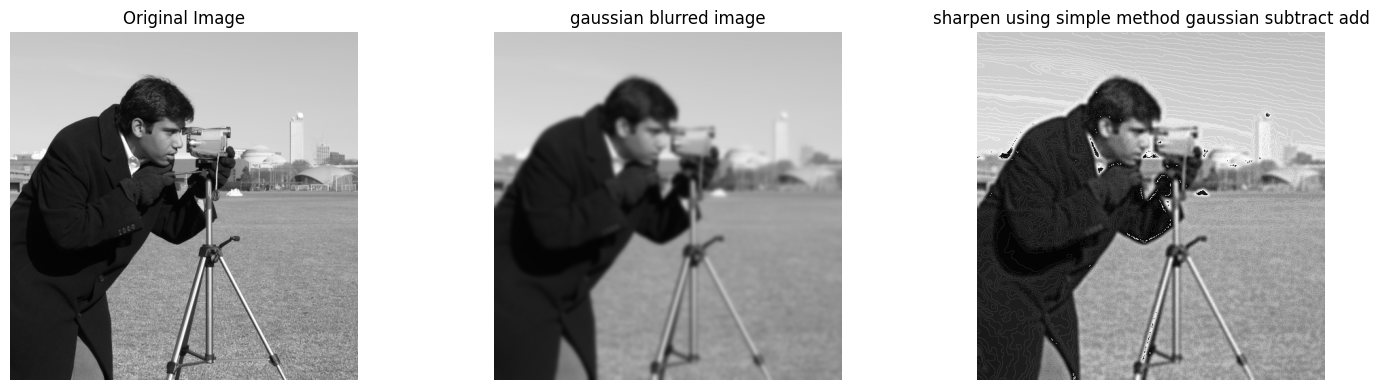

In [ ]:
blur_image = sample_images['Blurred (Gaussian) Image']

simple_sharpen_image = simple_sharpen_filter(blur_image, alpha=20)

images = [
    (sample_images['Original'], "Original Image"),
    (blur_image, "gaussian blurred image"),

    (simple_sharpen_image, "sharpen using simple method gaussian subtract add")

]

visualize_images(images)


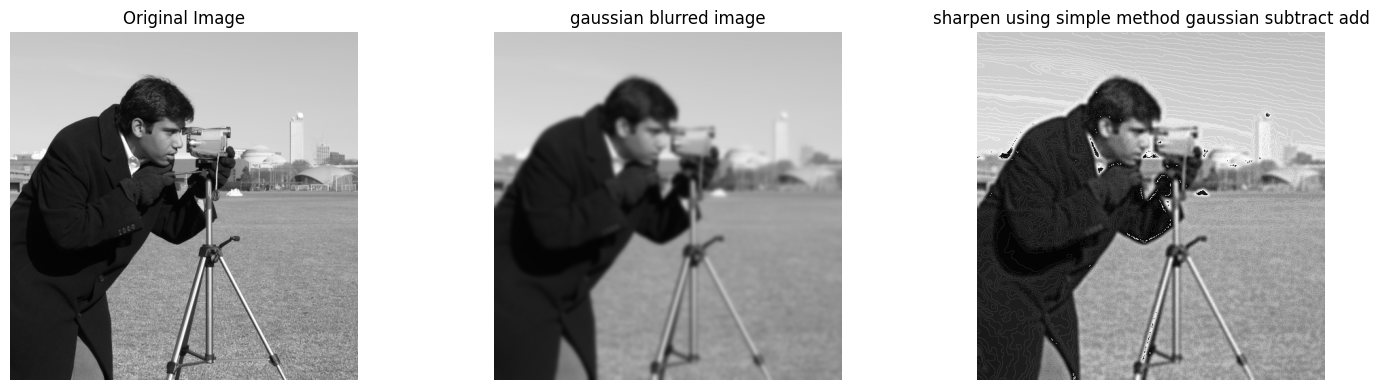

In [ ]:
simple_sharpen_image = simple_sharpen_filter(blur_image, alpha=50)

images_2 = [
    (sample_images['Original'], "Original Image"),
    (blur_image, "gaussian blurred image"),

    (simple_sharpen_image, "sharpen using simple method gaussian subtract add")

]

visualize_images(images_2)

sharpening dengan alpha=20 dengan hasil paling bagus, namun ada artefak berupa halo dan juga seperti lubang di beberapa bagian gambar. Nilai alpha terlalu tinggi menyebabkan efek halo

Image dengan pattern periodik enhancing dengan Frequency based filtering

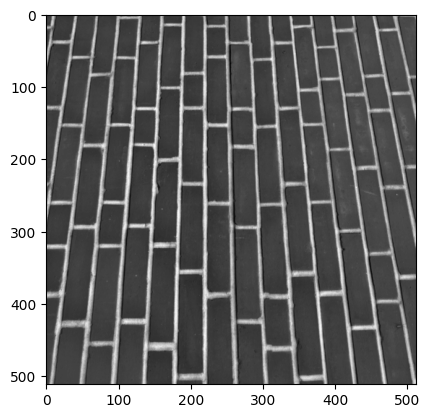

In [ ]:
img_pattern = data.brick()
img_pattern =  cv2.normalize(img_pattern, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

plt.imshow(img_pattern, cmap='gray')
plt.show()


In [ ]:
def fourier_transform(images):
  """
  """
  image_float = images.astype(np.float32)

  f = np.fft.fft2(image_float)
  fshift = np.fft.fftshift(f)

  magnitude_spectrum = 20 * np.log(np.abs(fshift))

  return fshift,magnitude_spectrum


def inverse_fourier_transform(images):
  """
  """

  f_ishift = np.fft.ifftshift(images)
  img_back = np.fft.ifft2(f_ishift)

  img_back = np.abs(img_back)

  return img_back

def make_low_pass_mask(shape, radius = 30):
  rows,cols = shape
  crows, ccol = rows // 2, cols // 2

  mask = np.zeros((rows, cols), dtype=np.uint8)
  cv2.circle(mask, (ccol, crows), radius, 1, thickness = -1)

  return mask

def make_high_pass_mask(shape, radius = 30):
  rows,cols = shape
  crows, ccol = rows // 2, cols // 2

  mask = np.zeros((rows, cols), dtype=np.uint8)
  cv2.circle(mask, (ccol, crows), radius, 0, thickness = -1)

  return mask

def apply_filter(image_freq, mask_func, **mask_kwargs):
  #pointer notation for extra parameter on the function passed in
  rows, cols = image_freq.shape[:2]
  mask = mask_func((rows, cols), **mask_kwargs)

  filtered_img = image_freq * mask

  return filtered_img



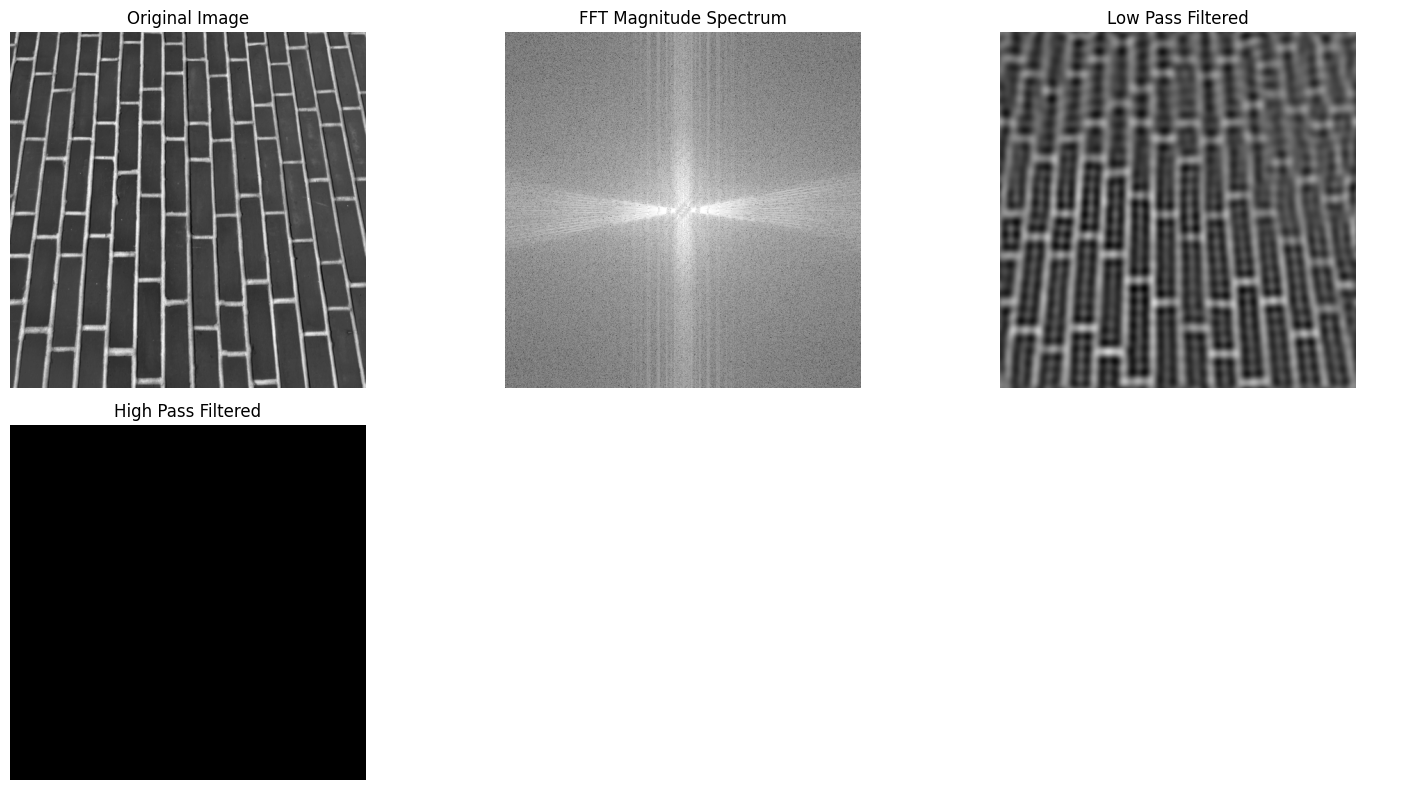

In [ ]:
fft_img, magnitude_spectrum = fourier_transform(img_pattern)
img_low_pass = apply_filter(fft_img, make_low_pass_mask, radius = 30)
img_high_pass = apply_filter(fft_img, make_high_pass_mask, radius = 15)
img_low_pass_back = inverse_fourier_transform(img_low_pass)
img_high_pass_back = inverse_fourier_transform(img_high_pass)

images = [
    (img_pattern, "Original Image"),
    (magnitude_spectrum, 'FFT Magnitude Spectrum'),  # This is already converted to real values
    (img_low_pass_back, "Low Pass Filtered"),
    (img_high_pass_back, "High Pass Filtered"),
]

visualize_images(images)




low pass filter mengambalikan gambar yang memiliki pattern pada gambar sedangkan yang high pass filter mengembalikan gambar yang gelap

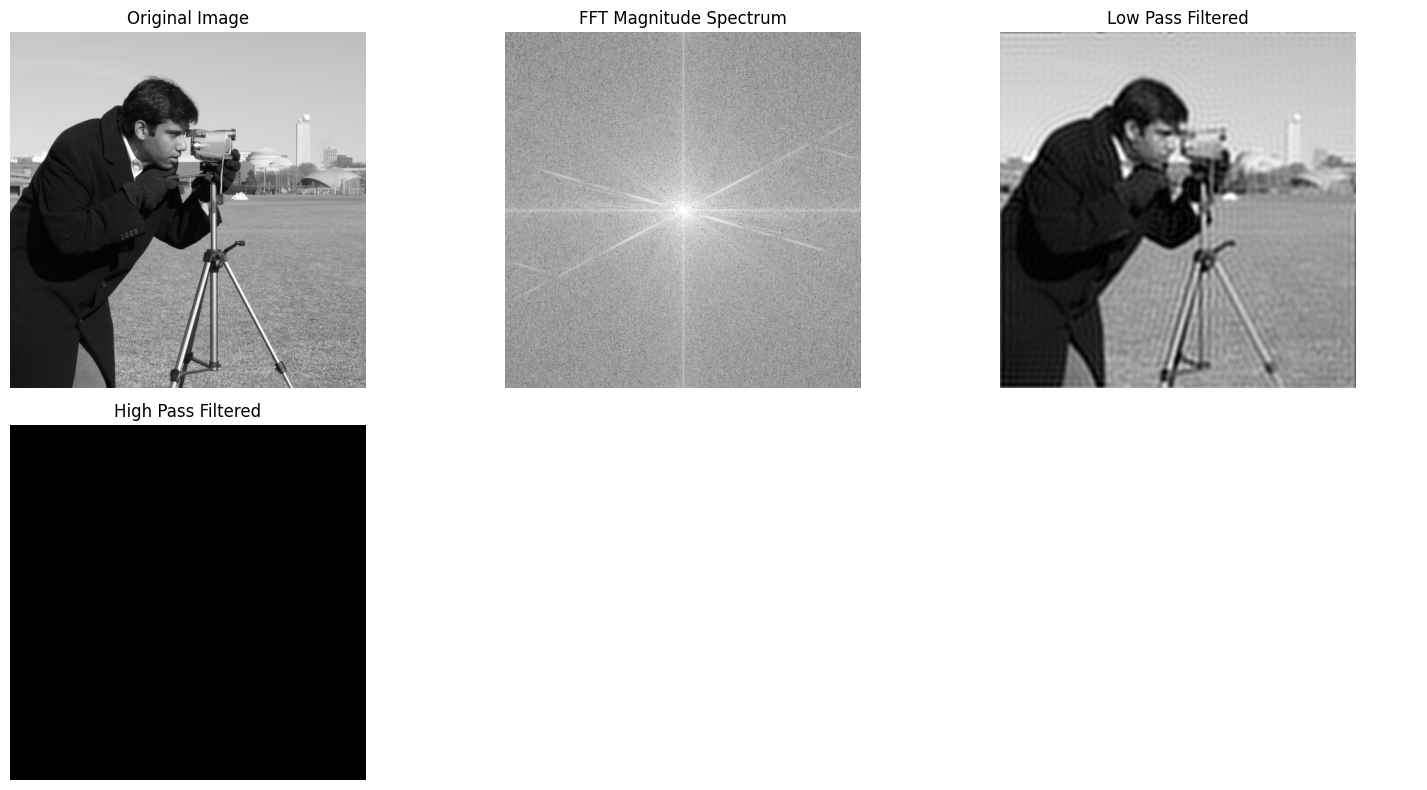

In [ ]:
img_ori = sample_images['Original']

fft_img, magnitude_spectrum = fourier_transform(img_ori)
img_low_pass = apply_filter(fft_img, make_low_pass_mask, radius = 50)
img_high_pass = apply_filter(fft_img, make_high_pass_mask, radius = 50)
img_low_pass_back = inverse_fourier_transform(img_low_pass)
img_high_pass_back = inverse_fourier_transform(img_high_pass)

images = [
    (img_ori, "Original Image"),
    (magnitude_spectrum, 'FFT Magnitude Spectrum'),  # This is already converted to real values
    (img_low_pass_back, "Low Pass Filtered"),
    (img_high_pass_back, "High Pass Filtered"),
]

visualize_images(images)

